In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [108]:
df = pd.read_excel('Clean_Single_Data.xlsx')
df

,No Amostra,Data de colheita,Zona de Produção,Espécie,Cd (mg/kg),Hg (mg/kg),Pb (mg/kg),E.coli (NMP/100G),Day,Month,Year
0,362/21,13/04/2021,ETJ,Pé-de-burro,0.24,0.028,0.24,NaN,13,Apr,2021
1,363/21,13/04/2021,ESD1,Ostra-portuguesa,0.50,0.026,0.12,NaN,13,Apr,2021
2,366/21,13/04/2021,RIAV 4,Ostra-japonesa,0.18,0.045,0.14,NaN,13,Apr,2021
3,369/21,19/04/2021,LOB,Amêijoa-relógio,0.09,0.011,0.70,NaN,19,Apr,2021
4,376/21,20/04/2021,L7c2,Amêijoa-boa,0.06,0.030,0.02,NaN,20,Apr,2021
...,...,...,...,...,...,...,...,...,...,...,...
1812,1044/22,28/09/2022,RIAV1,Longueirão,0.13,0.016,0.14,20.0,28,Sept,2022
1813,1045/22,28/09/2022,RIAV1,Berbigão,0.16,0.030,0.10,20.0,28,Sept,2022
1814,1046/22,28/09/2022,RIAV1,Amêijoa-japonesa,0.26,0.017,0.06,NaN,28,Sept,2022
1815,1047/22,28/09/2022,L1,Mexilhão,0.28,0.012,0.18,NaN,28,Sept,2022


# Data Cleaning

* Selecting just a small amount odf species
* Based on the 'Zona de produção' let´s crete a new column called 'Production Area' with the respective 'Production Area'
* Getting 'Season' Column
* Dealing with Missing Values


In [109]:
# Let´s select only the species we want to analyse
df = df[(df['Espécie']=='Ostra-japonesa') |
  (df['Espécie']=='Mexilhão') |
  (df['Espécie']=='Amêijoa-boa') |
  (df['Espécie']=='Ostra-portuguesa') |
  (df['Espécie']=='Amêijoa-japonesa') |
  (df['Espécie']=='Lambujinha')]

df['Espécie'].value_counts()

Ostra-japonesa      259
Mexilhão            245
Amêijoa-boa         226
Ostra-portuguesa    214
Amêijoa-japonesa    163
Lambujinha          151
Name: Espécie, dtype: int64

In [110]:
# Cleaning 'Zona de Produòao'
df['Zona de Produção'].value_counts()

ETJ       166
ESD1      101
EMR        99
ESD2       80
LOB        60
OLH4       38
OLH2       36
ELM        35
TAV        35
OLH5       35
LAG        35
RIAV1      35
FAR2       34
FUZ        33
RIAV4      33
RIAV3      32
L5         32
EMN        31
RIAV2      29
OLH1       29
FAR1       29
POR2       26
L7c1       19
OLH3       18
LAL        17
L4         16
L7a        15
L1         15
VT         14
L7b        14
GUA        12
L7c2       10
POR3        9
L2          9
L8          8
L3          6
ZNV         4
L6          3
EMI         3
RIAV 4      3
Name: Zona de Produção, dtype: int64

In [111]:
df.loc[df['Zona de Produção'].isin(['RIAV1',
                                   'RIAV4',
                                   'RIAV3',
                                   'RIAV2']),'Zona de Produção'] = 'RIAV'

df.loc[df['Zona de Produção'].isin(['OLH1',
                                   'OLH4',
                                   'OLH3',
                                   'OLH2',
                                   'OLH5']),'Zona de Produção'] = 'OLH'

df.loc[df['Zona de Produção'].isin(['FAR1',
                                   'FAR2']),'Zona de Produção'] = 'FAR'

df.loc[df['Zona de Produção'].isin(['POR2',
                                   'POR3']),'Zona de Produção'] = 'POR'

In [112]:
def production_area(area):
    if area == 'ELM':
        return 'Norte'
    if area == 'L1':
        return 'Norte'
    elif area == 'EMI':
        return 'Centro'
    elif area == 'RIAV':
        return 'Centro'
    elif area=='L4':
        return 'Centro'
    elif area == 'EMN':
        return 'Centro'
    elif area == 'L5':
        return 'Lisboa e Vale do Tejo'
    elif area == 'ETJ':
        return 'Lisboa e Vale do Tejo'
    elif area == 'LOB':
        return 'Lisboa e Vale do Tejo'
    elif area == 'ESD1':
        return 'Alentejo'
    elif area == 'ESD2':
        return 'Alentejo'
    elif area == 'EMR':
        return 'Alentejo'
    elif area == 'L6':
        return 'Alentejo'
    elif area == 'OLH':
        return 'Algarve'
    elif area == 'FAR':
        return 'Algarve'
    elif area == 'FUZ':
        return 'Algarve'
    elif area == 'TAV':
        return 'Algarve'
    elif area == 'VT':
        return 'Algarve'
    elif area == 'L7c1':
        return 'Algarve'
    elif area == 'L7a':
        return 'Algarve'
    elif area == 'L7b':
        return 'Algarve'
    elif area == 'L8':
        return 'Algarve'
    elif area == 'POR':
        return 'Algarve'
    elif area == 'LAG':
        return 'Algarve'
    elif area == 'LAL':
        return 'Algarve'

In [113]:
df['Área de Produção'] = df['Zona de Produção'].apply(production_area)
df['Área de Produção'].value_counts()

Algarve                  444
Alentejo                 283
Lisboa e Vale do Tejo    258
Centro                   179
Norte                     50
Name: Área de Produção, dtype: int64

In [114]:
# Getting the Season
def season(month):
    if month == 'Jan':
        return 'Rainny'
    elif month == 'Feb':
        return 'Rainny'
    elif month=='Mar':
        return 'Rainny'
    elif month=='Apr':
        return 'Dry'
    elif month=='May':
        return 'Dry'
    elif month == 'Jun':
        return 'Dry'
    elif month=='Jul':
        return 'Dry'
    elif month=='Aug':
        return 'Dry'
    elif month=='Sept':
        return 'Dry'
    elif month=='Oct':
        return 'Rainny'
    elif month=='Nov':
        return 'Rainny'
    elif month=='Dec':
        return 'Rainny'
df['Season'] = df['Month'].apply(season)

In [115]:
# Droping missing values
df.dropna(inplace=True)
df.head()

,No Amostra,Data de colheita,Zona de Produção,Espécie,Cd (mg/kg),Hg (mg/kg),Pb (mg/kg),E.coli (NMP/100G),Day,Month,Year,Área de Produção,Season
8,618/20,11/ago/2020,EMN,Ostra-japonesa,0.14,0.019,0.08,17.0,11,Aug,2020,Centro,Dry
10,647/20,19/ago/2020,EMR,Ostra-portuguesa,0.90,0.016,0.06,17.0,19,Aug,2020,Alentejo,Dry
27,60/22,08/02/2022,EMR,Ostra-portuguesa,1.20,0.030,0.01,45.0,8,Feb,2022,Alentejo,Rainny
45,510/21,08/06/2021,RIAV,Amêijoa-boa,0.04,0.019,0.01,490.0,8,Jun,2021,Centro,Dry
200,15227,06/Abr/2016,EMI,Amêijoa-japonesa,0.18,0.024,0.20,1300.0,6,Apr,2016,Centro,Dry


# PCA Analyse

Let´s only use numerical data in order to perform the pca

## 1. Data Preprocessing

In [116]:
df_1= df[['Espécie','Área de Produção','Season','Cd (mg/kg)','Hg (mg/kg)','E.coli (NMP/100G)','Pb (mg/kg)']]
df_p = df_1.copy()
df_p

,Espécie,Área de Produção,Season,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg)
8,Ostra-japonesa,Centro,Dry,0.14,0.019,17.0,0.08
10,Ostra-portuguesa,Alentejo,Dry,0.90,0.016,17.0,0.06
27,Ostra-portuguesa,Alentejo,Rainny,1.20,0.030,45.0,0.01
45,Amêijoa-boa,Centro,Dry,0.04,0.019,490.0,0.01
200,Amêijoa-japonesa,Centro,Dry,0.18,0.024,1300.0,0.20
...,...,...,...,...,...,...,...
1798,Ostra-japonesa,Centro,Dry,0.35,0.025,78.0,0.21
1803,Mexilhão,Lisboa e Vale do Tejo,Dry,0.20,0.011,40.0,0.15
1804,Ostra-portuguesa,Alentejo,Dry,1.40,0.030,230.0,0.01
1806,Ostra-japonesa,Norte,Dry,0.20,0.030,490.0,0.10


__Encoding Categorical Data__

In [117]:
categorical_columns = ['Espécie','Área de Produção','Season']
for col in categorical_columns:
    print('There are {} unique values in the column {}'.format(df[col].nunique(),col))

There are 6 unique values in the column Espécie
There are 5 unique values in the column Área de Produção
There are 2 unique values in the column Season


In [118]:
# One-Hot Encoding
df_p = pd.get_dummies(df_p, columns=categorical_columns)
df_p.head()

,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg),Espécie_Amêijoa-boa,Espécie_Amêijoa-japonesa,Espécie_Lambujinha,Espécie_Mexilhão,Espécie_Ostra-japonesa,Espécie_Ostra-portuguesa,Área de Produção_Alentejo,Área de Produção_Algarve,Área de Produção_Centro,Área de Produção_Lisboa e Vale do Tejo,Área de Produção_Norte,Season_Dry,Season_Rainny
8,0.14,0.019,17.0,0.08,0,0,0,0,1,0,0,0,1,0,0,1,0
10,0.90,0.016,17.0,0.06,0,0,0,0,0,1,1,0,0,0,0,1,0
27,1.20,0.030,45.0,0.01,0,0,0,0,0,1,1,0,0,0,0,0,1
45,0.04,0.019,490.0,0.01,1,0,0,0,0,0,0,0,1,0,0,1,0
200,0.18,0.024,1300.0,0.20,0,1,0,0,0,0,0,0,1,0,0,1,0


__Feature Scaling__

In [119]:
sc = StandardScaler()
df_pca = sc.fit_transform(df_pca)
df_pca

array([[-0.48694885, -0.53931858, -0.45701545, -0.2620864 ],
       [ 1.41248193, -0.69948608, -0.49057817, -0.2620864 ],
       [ 2.16225724,  0.04796225, -0.57448497, -0.25656339],
       ...,
       [ 2.66210745,  0.04796225, -0.57448497, -0.22007211],
       [-0.33699379,  0.04796225, -0.42345273, -0.16878707],
       [-0.06207618,  0.04796225, -0.37310865, -0.10961202]])

## 2. Aplly PCA

In [120]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_pca)

# Crete a dataframe with pca_results
pca_results = pd.DataFrame(pca_results,columns=['PC1','PC2'])

# Calculating the explainde variance
# Variance Explained By Each PCA
explained_variance = pca.explained_variance_
print(f"Explained Variance by PCA1 and PCA2 respectively: {explained_variance}")

# Get a PCA dataframe with the results
df_1.reset_index(inplace=True)
df_1.drop(columns=['index'],inplace=True)
df_1.reset_index(inplace=True)

pca_results.reset_index(inplace=True)

df_pca1 = pd.merge(df_1,pca_results, on='index',how='left')
df_pca1.drop(columns=['index'],inplace=True)
df_pca1

Explained Variance by PCA1 and PCA2 respectively: [1.78078583 0.98605673]


,Espécie,Área de Produção,Season,Cd (mg/kg),Hg (mg/kg),E.coli (NMP/100G),Pb (mg/kg),PC1,PC2
0,Ostra-japonesa,Centro,Dry,0.14,0.019,17.0,0.08,-0.504765,0.067422
1,Ostra-portuguesa,Alentejo,Dry,0.90,0.016,17.0,0.06,-1.343033,-0.287310
2,Ostra-portuguesa,Alentejo,Rainny,1.20,0.030,45.0,0.01,-1.207827,-0.622085
3,Amêijoa-boa,Centro,Dry,0.04,0.019,490.0,0.01,-0.468826,0.224603
4,Amêijoa-japonesa,Centro,Dry,0.18,0.024,1300.0,0.20,-0.193899,0.182327
...,...,...,...,...,...,...,...,...,...
359,Ostra-japonesa,Centro,Dry,0.35,0.025,78.0,0.21,-0.356352,-0.148071
360,Mexilhão,Lisboa e Vale do Tejo,Dry,0.20,0.011,40.0,0.15,-0.753193,0.133269
361,Ostra-portuguesa,Alentejo,Dry,1.40,0.030,230.0,0.01,-1.389002,-0.693749
362,Ostra-japonesa,Norte,Dry,0.20,0.030,490.0,0.10,-0.151077,-0.034942


## 4. Correlation Between Variabels

<Axes: >

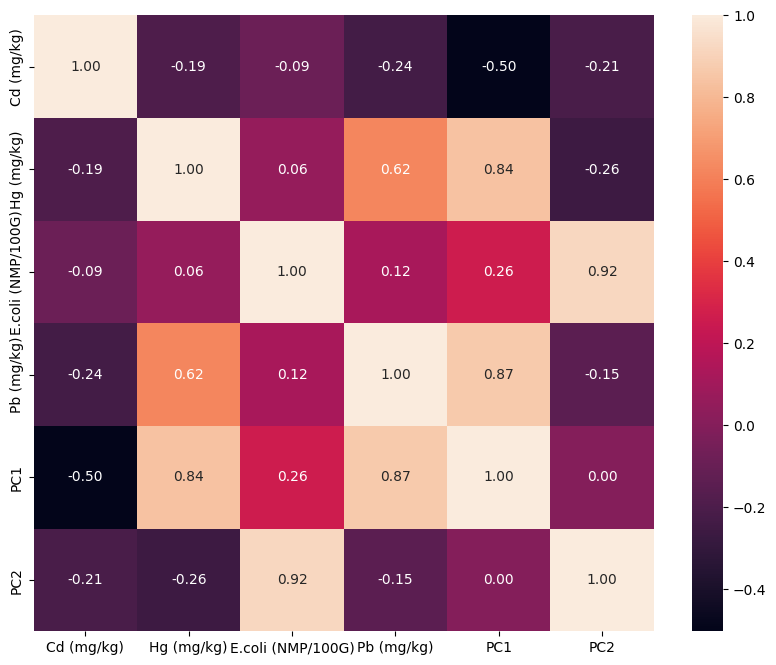

In [123]:
corr = df_pca1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, fmt = '.2f')

## 4. PC1 VS PC2

__By Specie__

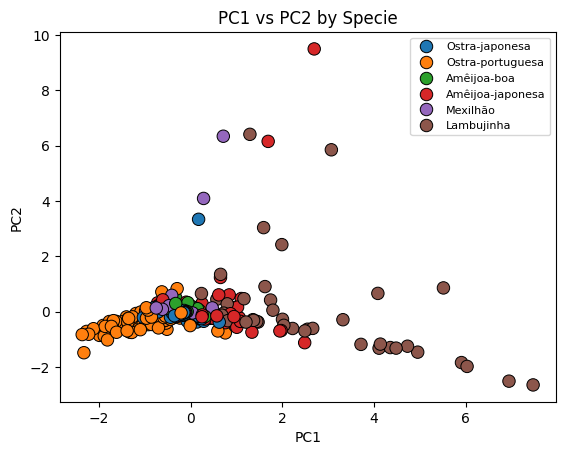

In [124]:
sns.scatterplot(data=df_pca1, x="PC1", y="PC2", hue='Espécie', marker='o',s=80,edgecolor='k',legend='full')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('PC1 vs PC2 by Specie')
plt.legend(fontsize=8, loc='best')
plt.show()

__Production Area__

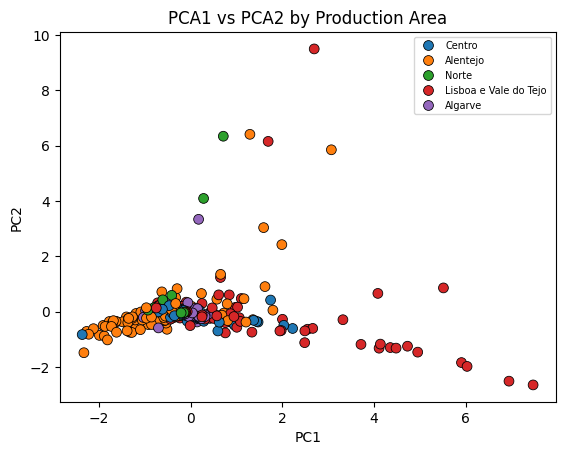

In [125]:
sns.scatterplot(data=df_pca1, x='PC1', y='PC2', hue='Área de Produção',
                marker='o', s=50, edgecolor='k', legend='full')
plt.legend(fontsize=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA1 vs PCA2 by Production Area')
plt.show()

__Season__

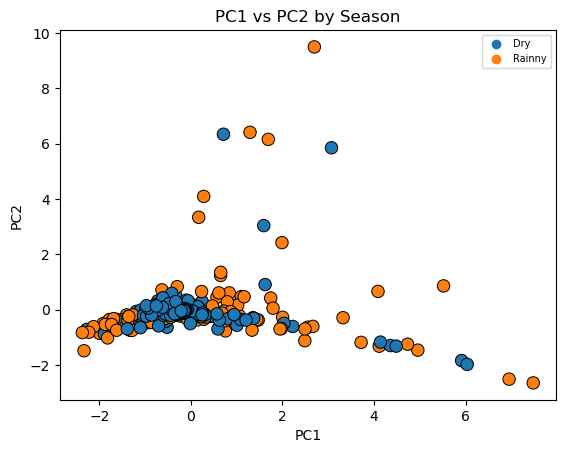

In [ ]:
sns.scatterplot(data = df_pca1, x= 'PC1',y = 'PC2', hue='Season', marker='o', s=80,edgecolor='k')
plt.legend(fontsize=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 by Season')
plt.show()